# IE4211 Project Group 24

<b>Group Members: <br>
Cherie Sukhita Irawan (A0159715W) <br>
Ng Jing Hui Darrell (A0155350M) <br>
Tan Ci Kang (A0159931W) <br></b>

<b>Import all the Libraries required for the Project</b>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns

import time

import statsmodels.formula.api as smf
import scipy.stats as ss

from sklearn import svm

from sklearn.metrics import *
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.utils import resample

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE

from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydot

import cvxpy as cp
import numpy as np

C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<b> Load Data-train.csv for Data Exploration </b>

In [2]:
data_train = pd.read_csv('Data-train.csv', index_col=0)
data_train.head()

,productID,brandID,attribute1,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,6,24,3.0,100.0,2418.0,278.97561,216.768293,56.928571,5,31.694915,0.338983,2.929825,0.431034,0.269841,2.120690,3.079365,1.943396,82
1,47,25,4.0,100.0,1723.0,79.90000,59.233333,49.285714,6,30.652174,0.217391,2.928571,0.604651,0.191489,2.302326,2.446809,2.093023,48
2,6,24,3.0,100.0,1666.0,298.00000,214.410714,48.857143,4,31.370370,0.148148,2.941176,0.519231,0.357143,2.153846,2.839286,2.104167,56
3,48,25,3.0,80.0,386.0,69.90000,40.664706,19.714286,4,32.222222,0.333333,3.111111,0.333333,0.272727,2.444444,2.700000,2.888889,17
4,47,25,4.0,100.0,1419.0,79.90000,58.703279,66.214286,4,31.020408,0.183673,2.978723,0.425532,0.218182,2.468085,2.490909,2.042553,61


<b> Find Correlation between Features </b>

In [3]:
data_train.corr()

,productID,brandID,attribute1,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
productID,1.000000,0.190414,0.051820,0.018744,-0.082898,0.074792,0.091497,-0.079811,-0.002343,0.084663,-0.019827,0.039869,0.043402,0.041966,-0.034579,-0.017999,0.028973,-0.061266
brandID,0.190414,1.000000,0.039658,-0.031100,0.029776,0.242871,0.147845,0.014146,0.018988,-0.096038,0.039874,0.067072,-0.078445,0.069359,-0.039329,0.117087,-0.062888,0.005926
attribute1,0.051820,0.039658,1.000000,0.643106,0.049304,0.360263,0.377507,0.033059,0.002471,-0.036177,-0.242693,0.143131,0.014209,0.054762,-0.125843,0.108605,-0.077623,0.029665
attribute2,0.018744,-0.031100,0.643106,1.000000,0.168479,0.369373,0.374981,0.147638,0.006264,-0.012496,-0.213611,0.105395,0.039045,0.077590,-0.109003,0.090240,-0.076800,0.117661
clickVolume,-0.082898,0.029776,0.049304,0.168479,1.000000,0.167440,0.114934,0.723921,-0.036779,-0.054060,-0.005997,-0.062936,-0.023115,0.006499,0.012437,-0.041505,0.027674,0.809854
avgOriginalUnitPrice,0.074792,0.242871,0.360263,0.369373,0.167440,1.000000,0.899895,0.090311,0.013583,0.037566,-0.209028,0.170931,0.020077,0.164956,-0.246630,0.175116,-0.125518,0.058788
avgFinalUnitPrice,0.091497,0.147845,0.377507,0.374981,0.114934,0.899895,1.000000,0.061164,0.009537,0.070535,-0.176845,0.129265,0.023294,0.110175,-0.246601,0.194259,-0.118951,-0.001668
ma14SalesVolume,-0.079811,0.014146,0.033059,0.147638,0.723921,0.090311,0.061164,1.000000,0.029922,-0.058149,-0.000779,-0.050351,-0.042011,-0.008243,0.005106,-0.056549,0.006853,0.691496
weekday,-0.002343,0.018988,0.002471,0.006264,-0.036779,0.013583,0.009537,0.029922,1.000000,0.016724,-0.028642,0.009959,0.003746,0.019681,0.002240,-0.002226,-0.058451,-0.016449
meanAge,0.084663,-0.096038,-0.036177,-0.012496,-0.054060,0.037566,0.070535,-0.058149,0.016724,1.000000,0.054092,0.065548,0.462438,0.040562,-0.068855,0.077794,-0.075656,-0.051563


These features are dropped in the next section due to the following reasons: <br> 
- 'brandID': This is because every product only has 1 brandID. Furthermore, 'brandID' also has many levels. <br>
- 'avgOriginalUnitPrice': This is because it is derived from 'avgFinalUnitPrice' and therefore highly correlated. There is no need to have 2 similar terms. 

In [4]:
data_train = data_train.drop(['avgOriginalUnitPrice', 'brandID'], axis=1)

<b> Plot Box Plot to Understand the Features </b>

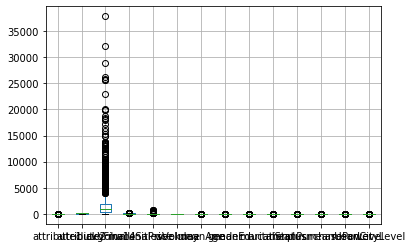

In [5]:
data_train.boxplot(column=['attribute1', 'attribute2', 'clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume', 'weekday', 'meanAge', 'gender', 'meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower', 'meanUserLevel', 'meanCityLevel'])
plt.show()

In [6]:
data_train.attribute1.unique()

array([3., 4., 2., 1.])

In [7]:
data_train.attribute2.unique()

array([100.,  80.,  60.,  70.,  50.,  90.,  40.,  30.])

These features are converted as categorical variables for the following reasons: <br>
- 'productID': Used to identify the different products <br>
- 'weekday': Used to identify the days of the week <br>
- 'attribute1' and 'attribute2': There are only a few discrete values

### Multiple Linear Regression

In [8]:
mlr_cat_results = smf.ols('sales ~ C(productID) + C(attribute1) + C(attribute2) + clickVolume + avgFinalUnitPrice + ma14SalesVolume + C(weekday) + meanAge + gender + meanEducation + maritalStatus + plus + meanPurchasePower + meanUserLevel + meanCityLevel', data=data_train).fit()
print(mlr_cat_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     64.03
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:11:08   Log-Likelihood:                -13452.
No. Observations:                2491   AIC:                         2.709e+04
Df Residuals:                    2397   BIC:                         2.764e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 29

The adjusted R-squared value for Multiple Linear Regression is 0.702, which is quite good. There are many features with high p-value> 0.05, which indicates that they are unlikely to have a linear relationship with sales.

In [9]:
data_train = pd.get_dummies(data_train, columns = ['productID', 'weekday', 'attribute1', 'attribute2'])
data_train.head()

,clickVolume,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,...,attribute1_3.0,attribute1_4.0,attribute2_30.0,attribute2_40.0,attribute2_50.0,attribute2_60.0,attribute2_70.0,attribute2_80.0,attribute2_90.0,attribute2_100.0
0,2418.0,216.768293,56.928571,31.694915,0.338983,2.929825,0.431034,0.269841,2.120690,3.079365,...,1,0,0,0,0,0,0,0,0,1
1,1723.0,59.233333,49.285714,30.652174,0.217391,2.928571,0.604651,0.191489,2.302326,2.446809,...,0,1,0,0,0,0,0,0,0,1
2,1666.0,214.410714,48.857143,31.370370,0.148148,2.941176,0.519231,0.357143,2.153846,2.839286,...,1,0,0,0,0,0,0,0,0,1
3,386.0,40.664706,19.714286,32.222222,0.333333,3.111111,0.333333,0.272727,2.444444,2.700000,...,1,0,0,0,0,0,0,1,0,0
4,1419.0,58.703279,66.214286,31.020408,0.183673,2.978723,0.425532,0.218182,2.468085,2.490909,...,0,1,0,0,0,0,0,0,0,1


Scatter Matrix are plotted to find the relationships between the variables. 

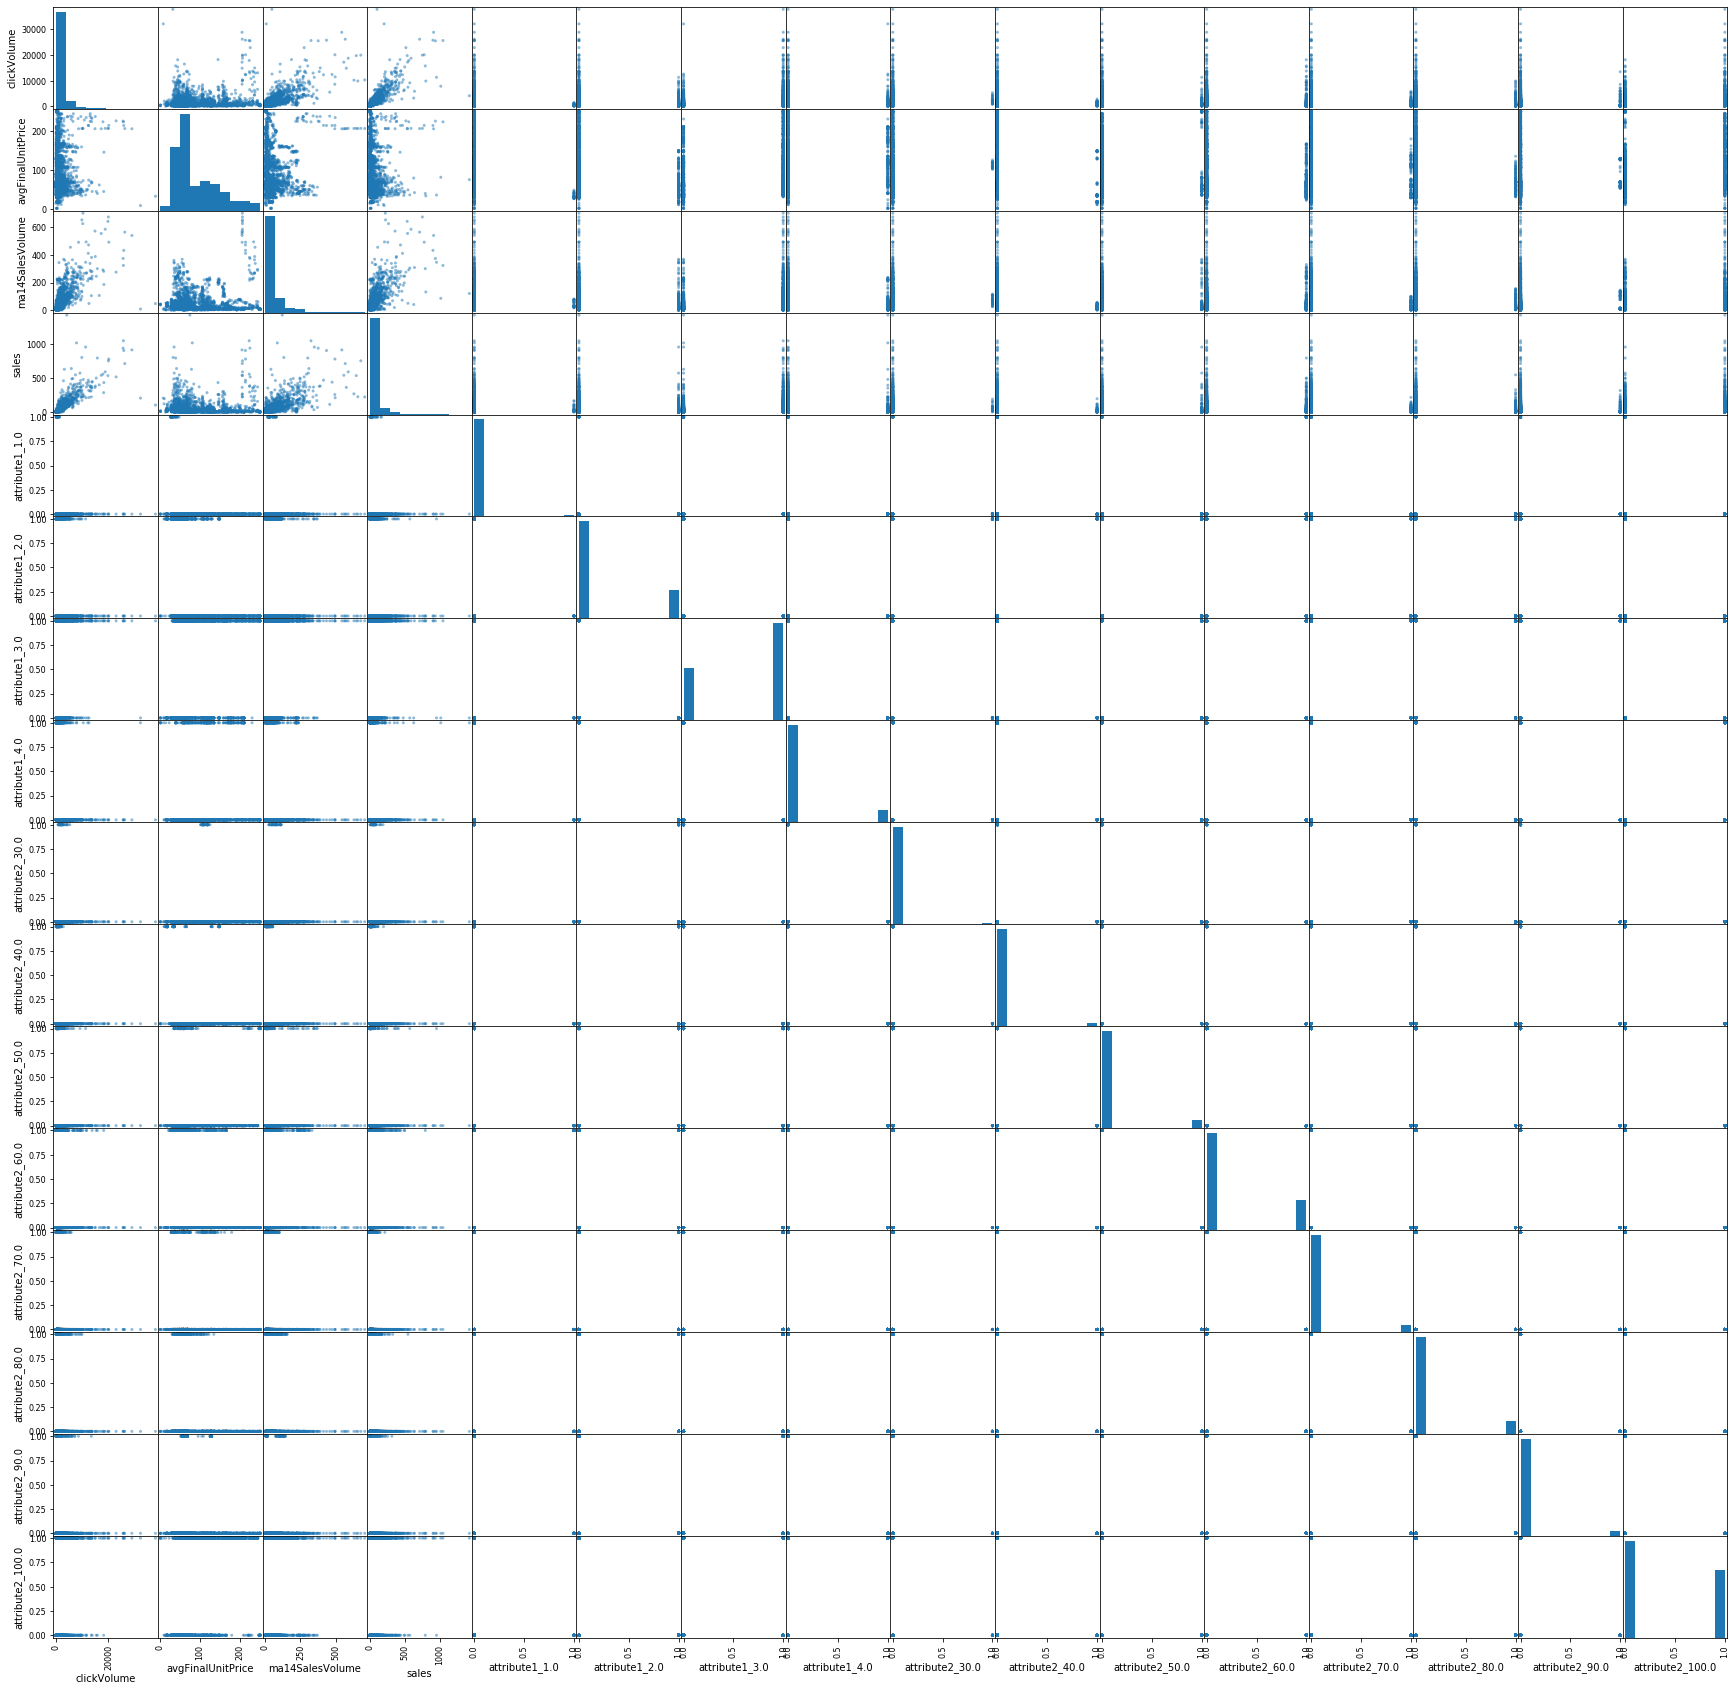

In [10]:
data_train_1 = data_train.drop(['meanAge',"gender","meanEducation","maritalStatus","plus","meanPurchasePower","meanUserLevel","meanCityLevel","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7","productID_6", "productID_47", "productID_48", "productID_28", "productID_51", "productID_30", "productID_17", "productID_65", "productID_15", "productID_52",  "productID_9", "productID_33",  "productID_5", "productID_67", "productID_46", "productID_40", "productID_60","productID_11","productID_73","productID_24","productID_44","productID_58","productID_26","productID_63","productID_36","productID_16","productID_27","productID_72","productID_32","productID_14","productID_8","productID_59","productID_25","productID_2","productID_57","productID_1","productID_7","productID_31","productID_37","productID_13","productID_34","productID_3","productID_61","productID_29","productID_43","productID_35","productID_42","productID_74","productID_49","productID_4","productID_38","productID_75","productID_41","productID_19","productID_71","productID_21","productID_70","productID_23","productID_50","productID_53","productID_39","productID_12","productID_45","productID_76","productID_64","productID_0","productID_55","productID_20","productID_69","productID_56","productID_66","productID_18","productID_68","productID_22","productID_54","productID_62","productID_10"], axis=1)
scatter_matrix(data_train_1,figsize=(30,30)) 
plt.show()

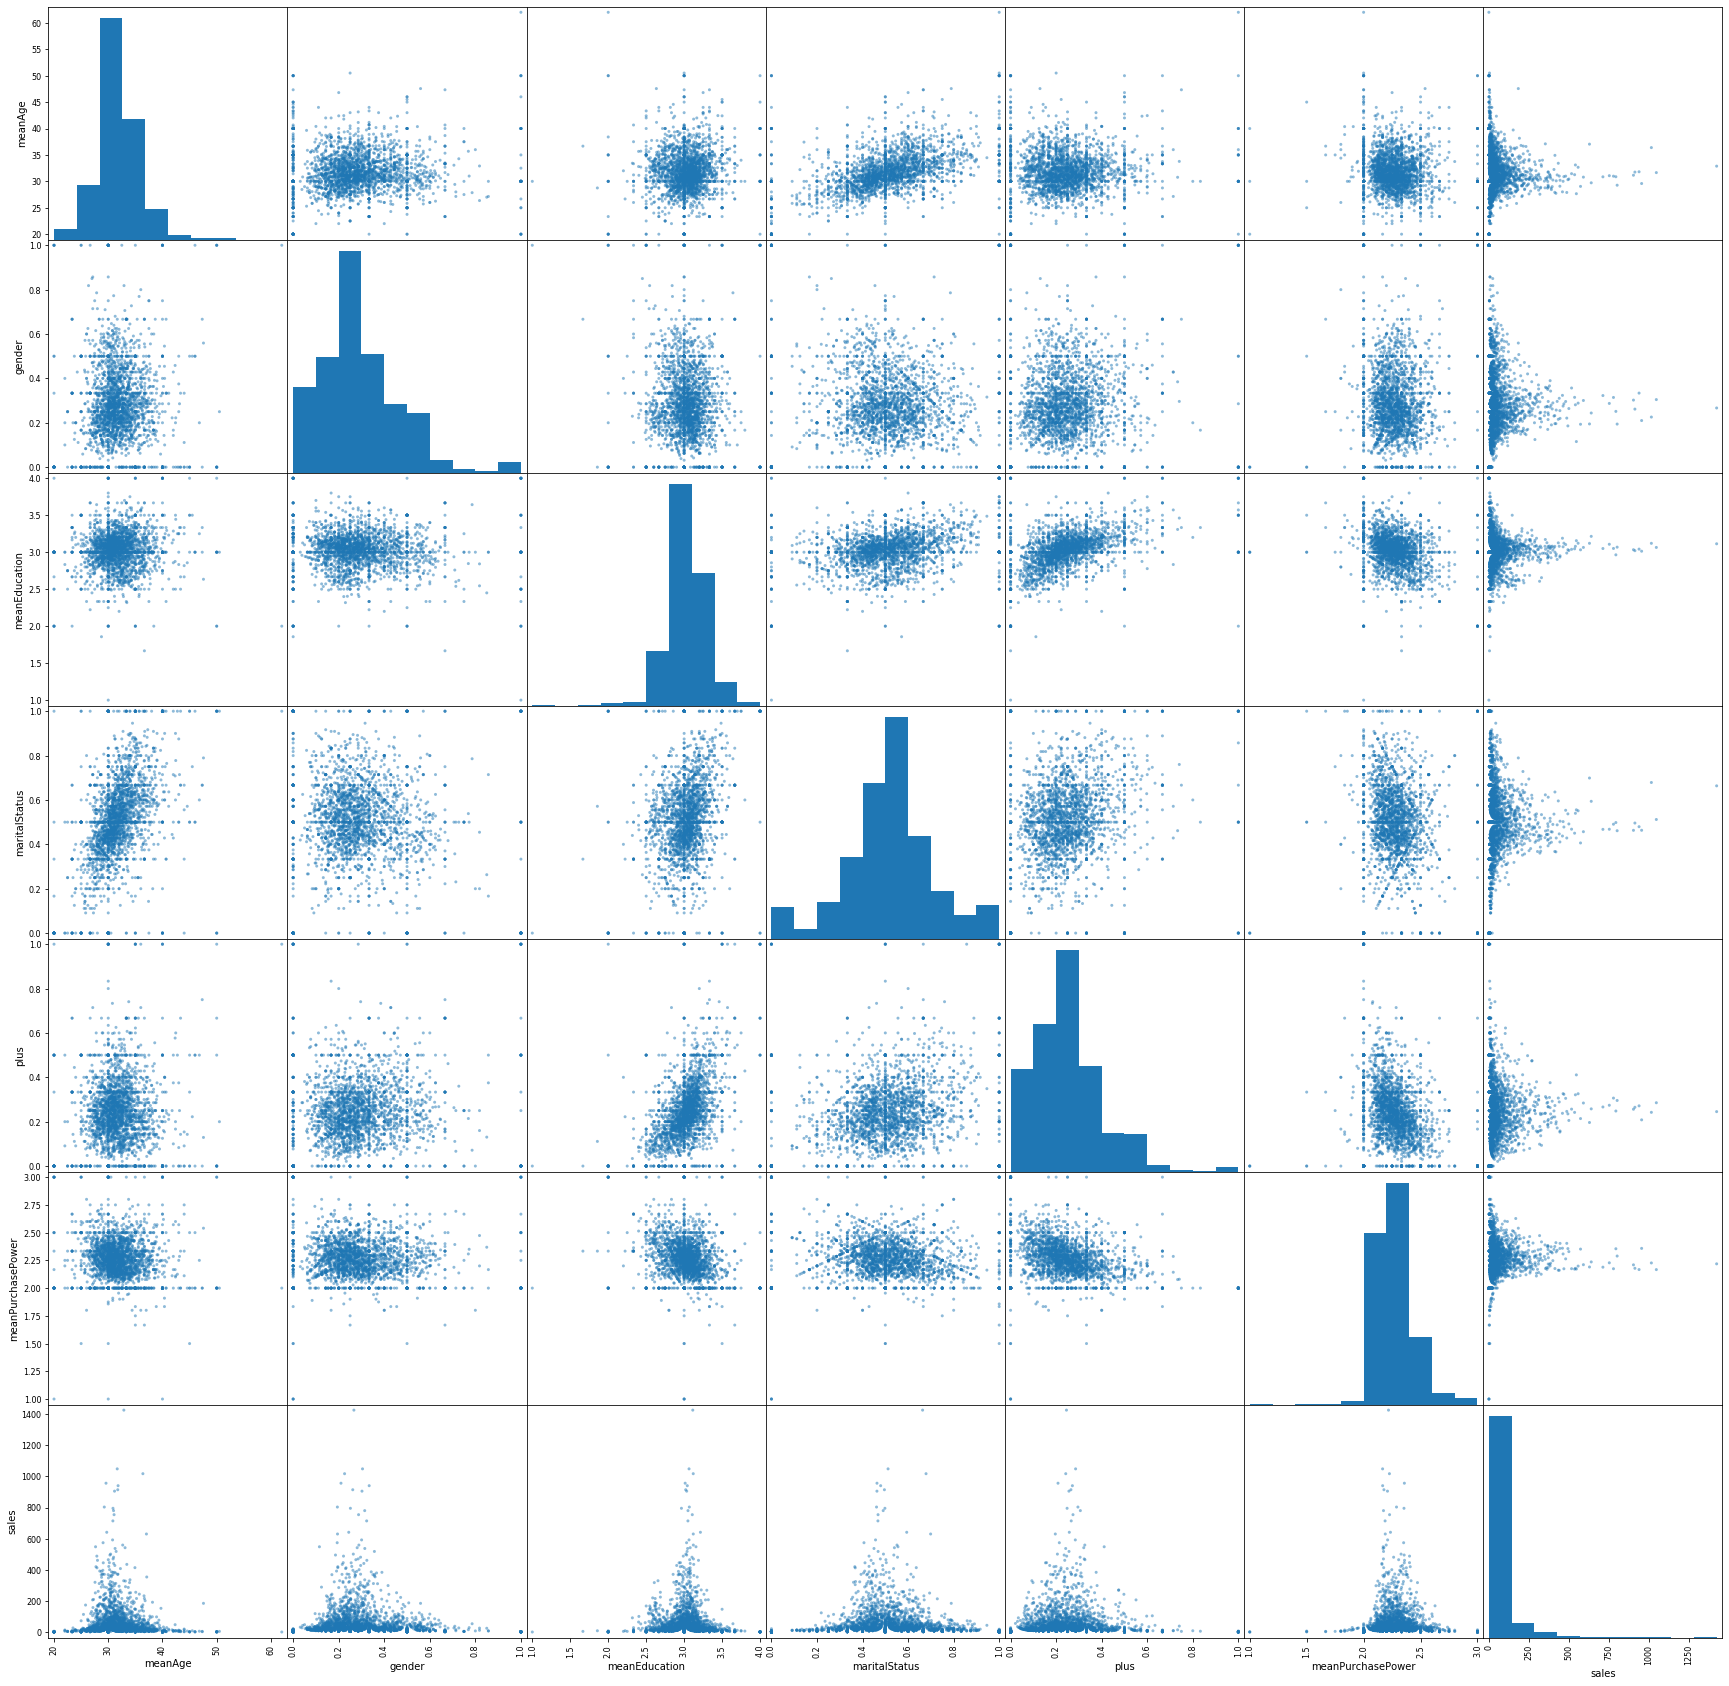

In [11]:
data_train_2 = data_train.drop(['attribute1_1.0','attribute1_2.0','attribute1_3.0','attribute1_4.0','attribute2_30.0','attribute2_40.0','attribute2_50.0','attribute2_60.0','attribute2_70.0','attribute2_80.0','attribute2_90.0','attribute2_100.0','clickVolume','avgFinalUnitPrice','ma14SalesVolume',"meanUserLevel","meanCityLevel","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7", "productID_6", "productID_47", "productID_48", "productID_28", "productID_51", "productID_30", "productID_17", "productID_65", "productID_15", "productID_52",  "productID_9", "productID_33",  "productID_5", "productID_67", "productID_46", "productID_40", "productID_60","productID_11","productID_73","productID_24","productID_44","productID_58","productID_26","productID_63","productID_36","productID_16","productID_27","productID_72","productID_32","productID_14","productID_8","productID_59","productID_25","productID_2","productID_57","productID_1","productID_7","productID_31","productID_37","productID_13","productID_34","productID_3","productID_61","productID_29","productID_43","productID_35","productID_42","productID_74","productID_49","productID_4","productID_38","productID_75","productID_41","productID_19","productID_71","productID_21","productID_70","productID_23","productID_50","productID_53","productID_39","productID_12","productID_45","productID_76","productID_64","productID_0","productID_55","productID_20","productID_69","productID_56","productID_66","productID_18","productID_68","productID_22","productID_54","productID_62","productID_10"], axis =1)
scatter_matrix(data_train_2,figsize=(30,30)) 
plt.show()

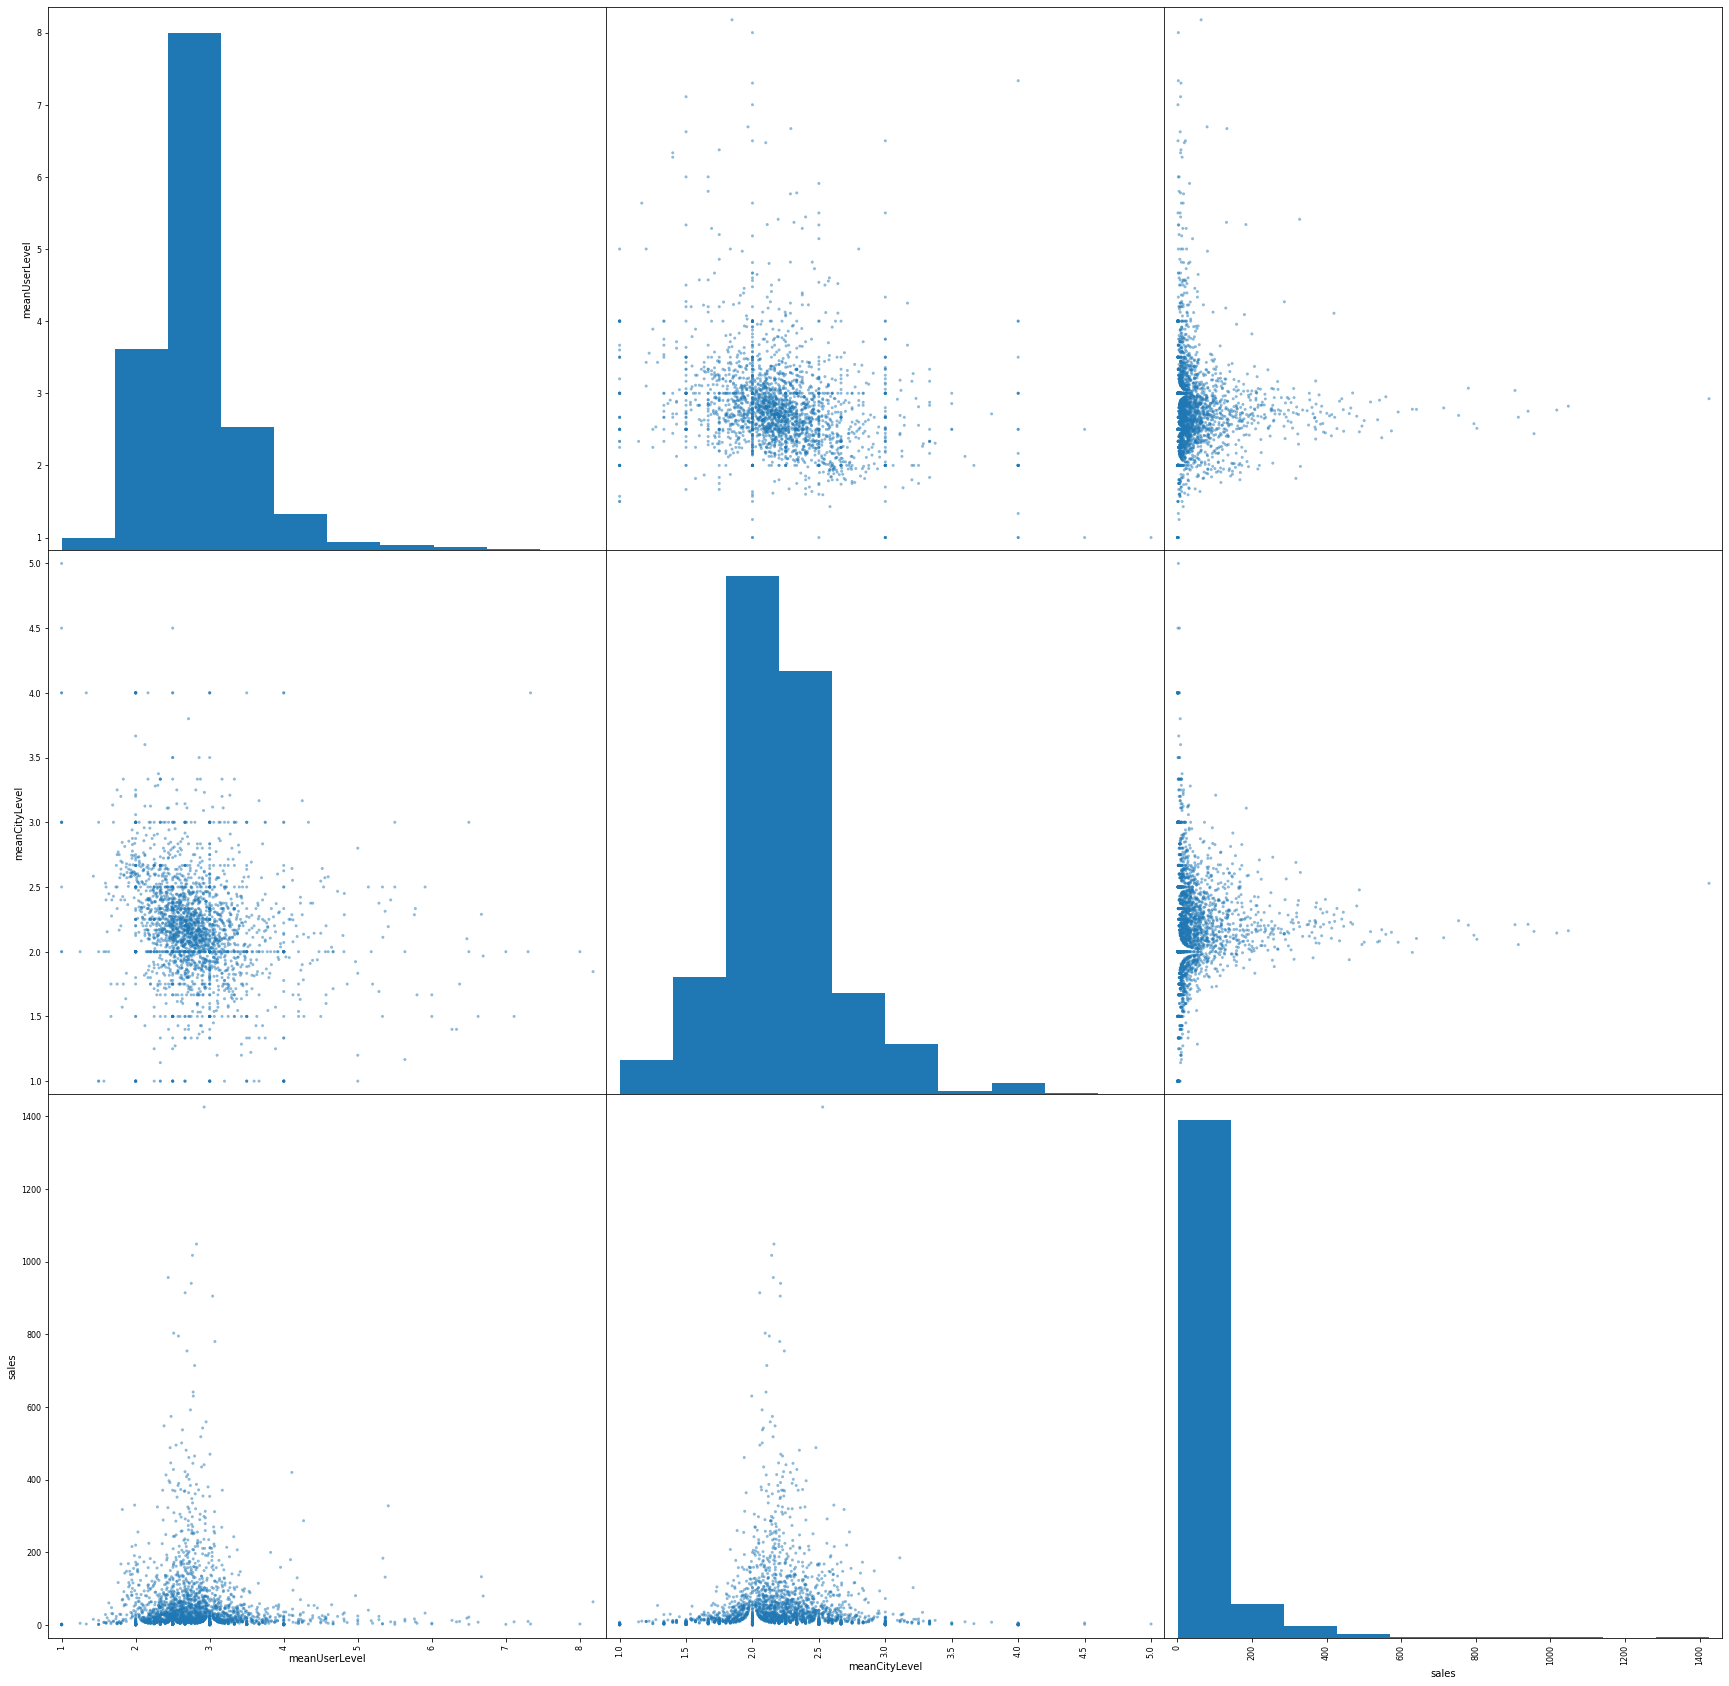

In [12]:
data_train_3 = data_train.drop(['attribute1_1.0','attribute1_2.0','attribute1_3.0','attribute1_4.0','attribute2_30.0','attribute2_40.0','attribute2_50.0','attribute2_60.0','attribute2_70.0','attribute2_80.0','attribute2_90.0','attribute2_100.0','clickVolume','avgFinalUnitPrice','ma14SalesVolume','meanAge',"gender","meanEducation","maritalStatus","plus","meanPurchasePower","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6","weekday_7","productID_6", "productID_47", "productID_48", "productID_28", "productID_51", "productID_30", "productID_17", "productID_65", "productID_15", "productID_52",  "productID_9", "productID_33",  "productID_5", "productID_67", "productID_46", "productID_40", "productID_60","productID_11","productID_73","productID_24","productID_44","productID_58","productID_26","productID_63","productID_36","productID_16","productID_27","productID_72","productID_32","productID_14","productID_8","productID_59","productID_25","productID_2","productID_57","productID_1","productID_7","productID_31","productID_37","productID_13","productID_34","productID_3","productID_61","productID_29","productID_43","productID_35","productID_42","productID_74","productID_49","productID_4","productID_38","productID_75","productID_41","productID_19","productID_71","productID_21","productID_70","productID_23","productID_50","productID_53","productID_39","productID_12","productID_45","productID_76","productID_64","productID_0","productID_55","productID_20","productID_69","productID_56","productID_66","productID_18","productID_68","productID_22","productID_54","productID_62","productID_10"], axis=1)
scatter_matrix(data_train_3,figsize=(30,30)) 
plt.show()

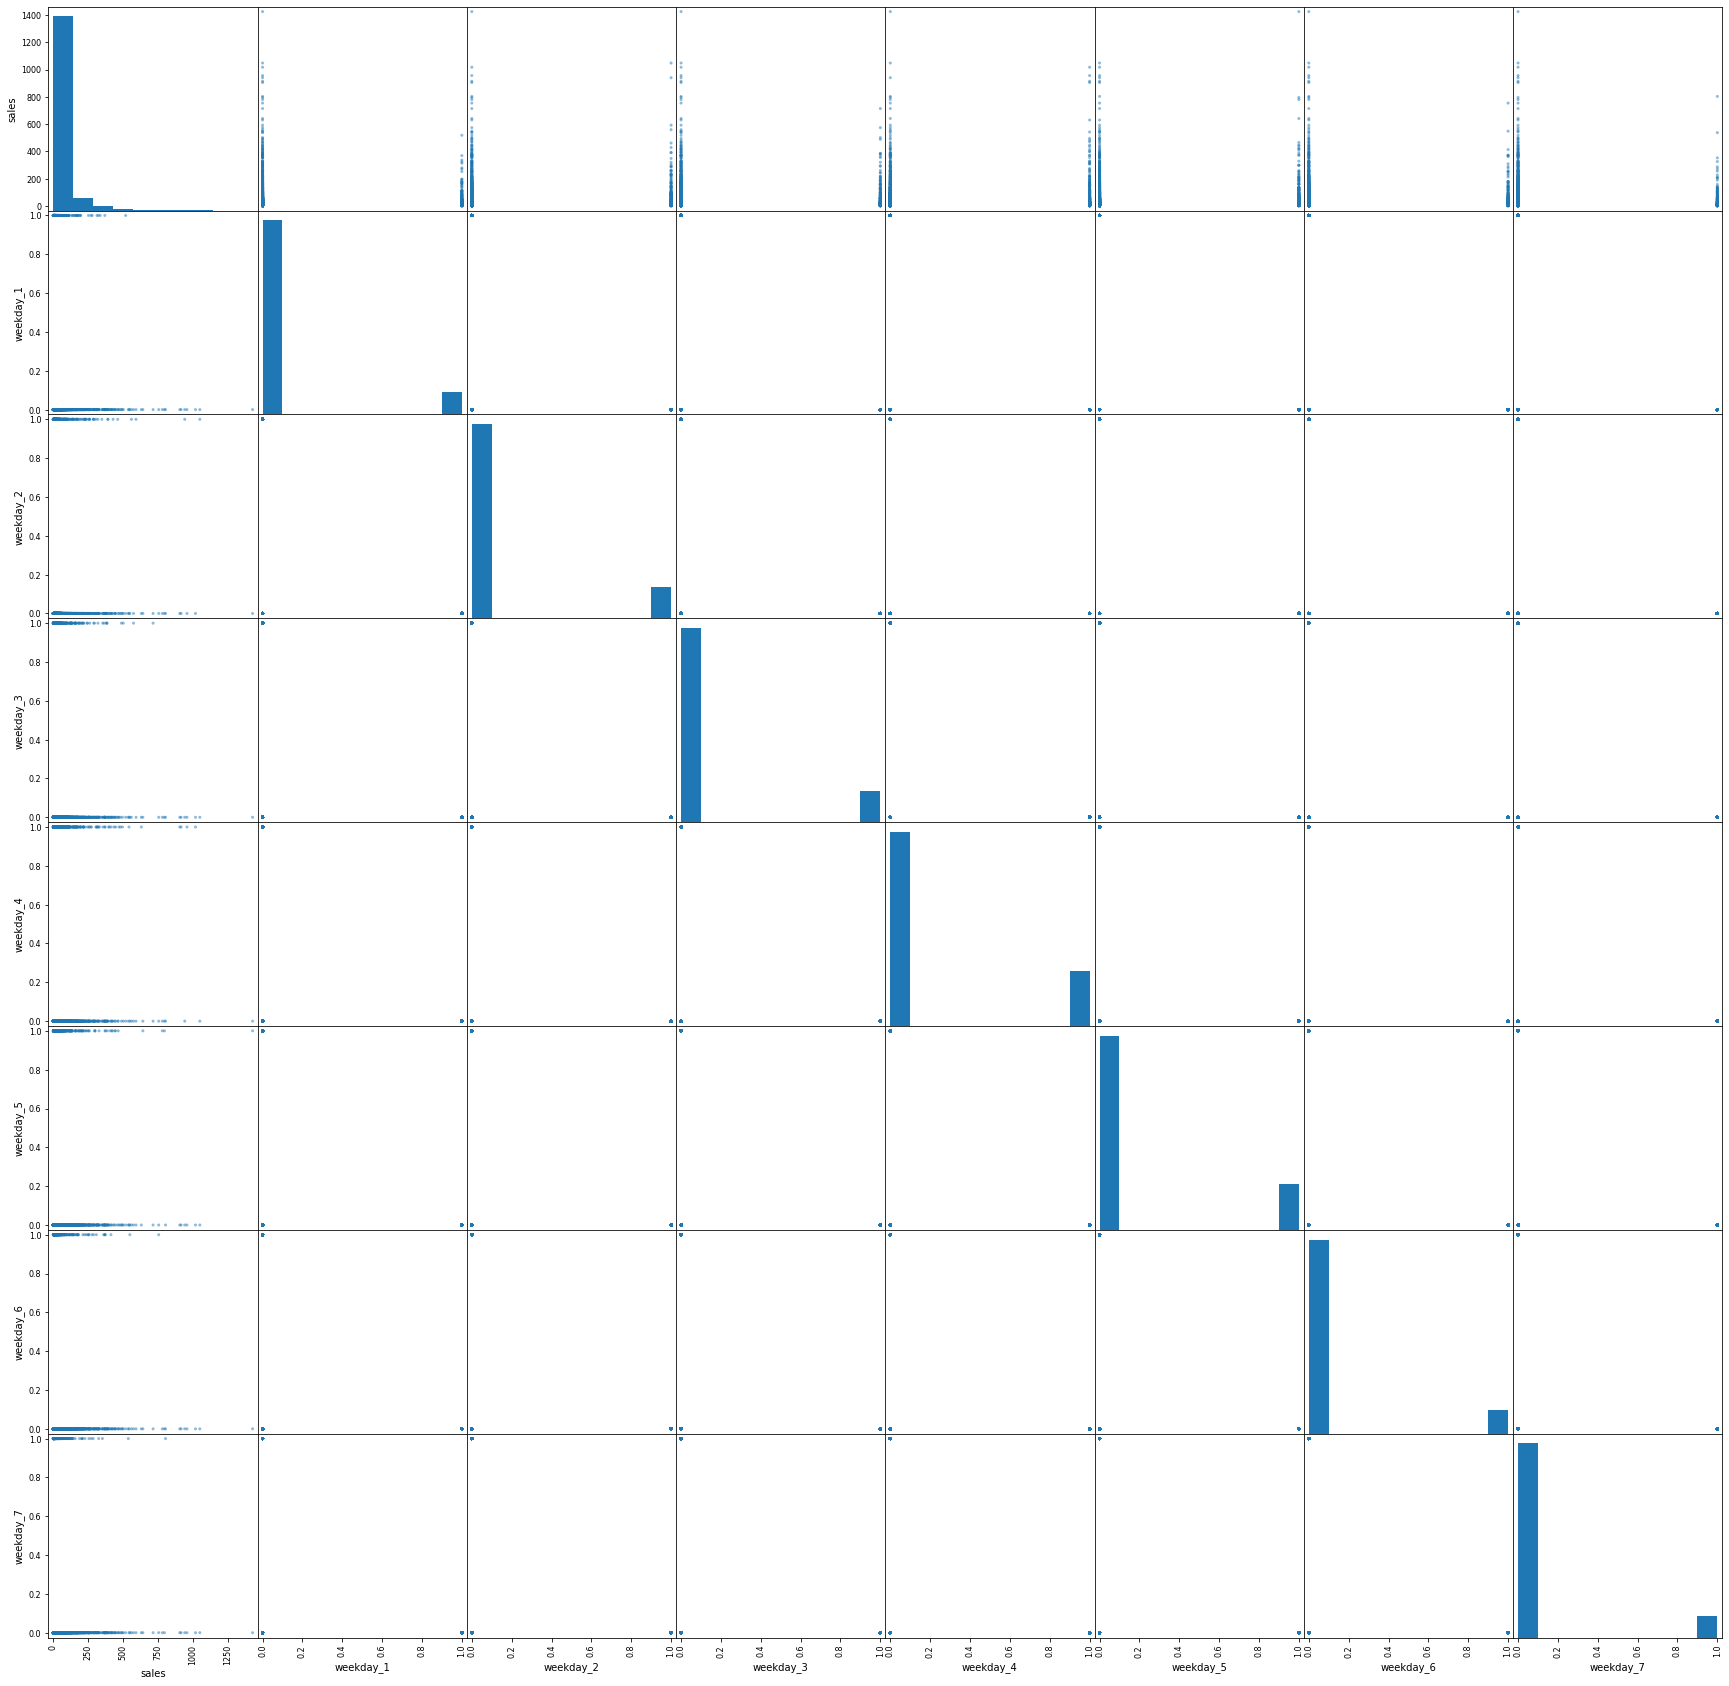

In [13]:
data_train_4=data_train.drop(['attribute1_1.0','attribute1_2.0','attribute1_3.0','attribute1_4.0','attribute2_30.0','attribute2_40.0','attribute2_50.0','attribute2_60.0','attribute2_70.0','attribute2_80.0','attribute2_90.0','attribute2_100.0','clickVolume','avgFinalUnitPrice','ma14SalesVolume','meanAge',"gender","meanEducation","maritalStatus","plus","meanPurchasePower","meanUserLevel","meanCityLevel","productID_6", "productID_47", "productID_48", "productID_28", "productID_51", "productID_30", "productID_17", "productID_65", "productID_15", "productID_52",  "productID_9", "productID_33",  "productID_5", "productID_67", "productID_46", "productID_40", "productID_60","productID_11","productID_73","productID_24","productID_44","productID_58","productID_26","productID_63","productID_36","productID_16","productID_27","productID_72","productID_32","productID_14","productID_8","productID_59","productID_25","productID_2","productID_57","productID_1","productID_7","productID_31","productID_37","productID_13","productID_34","productID_3","productID_61","productID_29","productID_43","productID_35","productID_42","productID_74","productID_49","productID_4","productID_38","productID_75","productID_41","productID_19","productID_71","productID_21","productID_70","productID_23","productID_50","productID_53","productID_39","productID_12","productID_45","productID_76","productID_64","productID_0","productID_55","productID_20","productID_69","productID_56","productID_66","productID_18","productID_68","productID_22","productID_54","productID_62","productID_10"], axis=1)
scatter_matrix(data_train_4,figsize=(30,30)) 
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(['sales'], axis=1), data_train.sales, test_size=0.2, random_state =10)
features = X_train.columns
features

Index(['clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume', 'meanAge',
       'gender', 'meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower',
       'meanUserLevel',
       ...
       'attribute1_3.0', 'attribute1_4.0', 'attribute2_30.0',
       'attribute2_40.0', 'attribute2_50.0', 'attribute2_60.0',
       'attribute2_70.0', 'attribute2_80.0', 'attribute2_90.0',
       'attribute2_100.0'],
      dtype='object', length=107)

### Linear Regression with Feature Selection

In [15]:
def linear_subset(feature_set):
    lr=LinearRegression()
    lr.fit(X_train[feature_set], y_train)
    return MSE(lr.predict(X_test[feature_set]), y_test)

In [16]:
testmse=[]
featureset=[]
for k in range(len(features)):
    lr=LinearRegression()
    rfe = RFE(lr, k+1)
    rfe.fit(X_train, y_train)
    featureset.append(features[rfe.support_])
    testmse.append(linear_subset(features[rfe.support_]))

In [17]:
featureset[np.argmin(testmse)]

Index(['clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume', 'meanAge',
       'gender', 'meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower',
       'meanUserLevel',
       ...
       'attribute1_3.0', 'attribute1_4.0', 'attribute2_30.0',
       'attribute2_40.0', 'attribute2_50.0', 'attribute2_60.0',
       'attribute2_70.0', 'attribute2_80.0', 'attribute2_90.0',
       'attribute2_100.0'],
      dtype='object', length=107)

Subset selection did not identify any features that were insignificant.

<b> Linear Regression Model </b>

In [18]:
lr=LinearRegression()
lr.fit(X_train,y_train)
MSE(lr.predict(X_test),y_test)

1375.2838313487412

In [19]:
lr.score(X_test, y_test)

0.7335771230717387

### LASSO and Ridge Regression

In [20]:
alpha = [1e-10, 1e-5, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

In [21]:
ss=StandardScaler(with_mean=False)
X = data_train.drop(['sales'], axis=1)
y = data_train.sales
X_stan = ss.fit_transform(X)
X_train_stan, X_test_stan, y_train_stan, y_test_stan = train_test_split(X_stan, y, test_size=0.2, random_state = 10)

Cross validation is performed to find the best alpha parameter.

<b> LASSO </b>

In [22]:
def KFold_MSE_lasso(alpha):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train_stan):
        X_kfoldtrain = X_train_stan[train_index]
        X_kfoldtest = X_train_stan[test_index]
        y_kfoldtrain = y_train_stan.iloc[train_index]
        y_kfoldtest = y_train_stan.iloc[test_index]
        model = Lasso(alpha=alpha)
        model.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(model.predict(X_kfoldtest),y_kfoldtest))        
    return np.mean(kfoldmse)  

In [23]:
lasso_mse_of_range_alpha=[]
for i in range(len(alpha)):
    lasso_mse_of_range_alpha.append(KFold_MSE_lasso(alpha[i]))
lasso_mse_of_range_alpha

C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795801.905554817, tolerance: 2117.5252604910715
  positive)
C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519798.10342430184, tolerance: 2048.5590999441965
  positive)
C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 845179.8168534893, tolerance: 2027.5183764640274
  positive)
C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38774.17309003882, tolerance: 2027.5183764640274
  positive)
C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40715.70569429919, tolerance: 1994.2990961517014
  positive)
C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23997.85995414015, tolerance: 2048.2326614612384
  positive)
C:\Users\Darrell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

[3941.0266745324357,
 3941.011939552104,
 3940.1343190714238,
 3938.4691707512757,
 3938.078809525146,
 3903.1647635785434,
 4030.710711696717,
 11229.15511171698,
 11229.15511171698]

In [24]:
lasso = Lasso(alpha=alpha[np.argmin(lasso_mse_of_range_alpha)])
lasso.fit(X_train_stan,y_train_stan)
MSE(lasso.predict(X_test_stan),y_test_stan)

1314.609793803192

<b> Ridge Regression</b>

In [25]:
def KFold_MSE_ridge(alpha):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train_stan):
        X_kfoldtrain = X_train_stan[train_index]
        X_kfoldtest = X_train_stan[test_index]
        y_kfoldtrain = y_train_stan.iloc[train_index]
        y_kfoldtest = y_train_stan.iloc[test_index]
        model = Ridge(alpha=alpha)
        model.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(model.predict(X_kfoldtest),y_kfoldtest))        
    return np.mean(kfoldmse) 

In [26]:
ridge_mse_of_range_alpha=[]
for i in range(len(alpha)):
    ridge_mse_of_range_alpha.append(KFold_MSE_ridge(alpha[i]))
ridge_mse_of_range_alpha

[3939.6108681572905,
 3939.5927806563136,
 3939.5906640819767,
 3939.5714298900093,
 3939.379683657463,
 3937.519414963823,
 3922.9408506885375,
 3867.23861126841,
 4221.897431390435]

In [27]:
ridge = Ridge(alpha=alpha[np.argmin(ridge_mse_of_range_alpha)])
ridge.fit(X_train_stan,y_train_stan)
MSE(ridge.predict(X_test_stan),y_test_stan)

1395.8561571241696

### Decision Trees

Cross validation is performed to find the best ccp_alpha parameter.

<b> Decision Tree Regressor </b>

In [28]:
ccpalpha = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,1,10]

In [29]:
def KFold_MSE_dt(ccpalpha):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train):
        X_kfoldtrain = X_train.iloc[train_index]
        X_kfoldtest = X_train.iloc[test_index]
        y_kfoldtrain = y_train.iloc[train_index]
        y_kfoldtest = y_train.iloc[test_index]
        model = DecisionTreeRegressor(ccp_alpha=ccpalpha, random_state=10)
        model.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(model.predict(X_kfoldtest),y_kfoldtest))        
    return np.mean(kfoldmse)  

In [30]:
dt_mse_of_range_alpha=[]
for i in range(len(ccpalpha)):
    dt_mse_of_range_alpha.append(KFold_MSE_dt(ccpalpha[i]))
dt_mse_of_range_alpha

[4120.012921603683,
 4127.6730329971715,
 4132.245054712765,
 4129.781516712415,
 4129.646156006749,
 4126.993375352783,
 4116.160063869988,
 4117.103253180775,
 4118.230836949096,
 4116.755311663174,
 4065.3184632194752,
 3994.826829980281]

In [31]:
dt = DecisionTreeRegressor(ccp_alpha=ccpalpha[np.argmin(dt_mse_of_range_alpha)], random_state=10)
dt.fit(X_train,y_train)
MSE(dt.predict(X_test),y_test)

2479.526815456063

<b>Bagging</b>

In [32]:
def KFold_MSE_bag(ccpalpha):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train):
        X_kfoldtrain = X_train.iloc[train_index]
        X_kfoldtest = X_train.iloc[test_index]
        y_kfoldtrain = y_train.iloc[train_index]
        y_kfoldtest = y_train.iloc[test_index]
        model = RandomForestRegressor(n_estimators=1000, max_features=None,random_state=10, ccp_alpha = ccpalpha)
        model.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(model.predict(X_kfoldtest),y_kfoldtest))        
    return np.mean(kfoldmse)

In [33]:
bag_mse_of_range_alpha=[]
for i in range(len(ccpalpha)):
    bag_mse_of_range_alpha.append(KFold_MSE_bag(ccpalpha[i]))
bag_mse_of_range_alpha

[2692.479961218474,
 2692.5967612394406,
 2692.7519877177947,
 2692.7800298431416,
 2692.87163346364,
 2692.8966509111146,
 2692.914488602113,
 2693.029569979986,
 2693.1701474016063,
 2693.3602864239465,
 2704.6103023190913,
 2777.2693967971854]

In [34]:
bagging = RandomForestRegressor(n_estimators=1000, max_features=None, ccp_alpha=ccpalpha[np.argmin(bag_mse_of_range_alpha)], random_state=10)
bagging.fit(X_train,y_train)
MSE(bagging.predict(X_test),y_test)

999.2047421265695

<b>Random Forest</b>

In [35]:
def KFold_MSE_rf(ccpalpha):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train):
        X_kfoldtrain = X_train.iloc[train_index]
        X_kfoldtest = X_train.iloc[test_index]
        y_kfoldtrain = y_train.iloc[train_index]
        y_kfoldtest = y_train.iloc[test_index]
        model = RandomForestRegressor(n_estimators=1000,random_state=10, ccp_alpha = ccpalpha)
        model.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(model.predict(X_kfoldtest),y_kfoldtest))        
    return np.mean(kfoldmse)

In [36]:
rf_mse_of_range_alpha=[]
for i in range(len(ccpalpha)):
    rf_mse_of_range_alpha.append(KFold_MSE_rf(ccpalpha[i]))
rf_mse_of_range_alpha

[2692.479961218474,
 2692.5967612394406,
 2692.7519877177947,
 2692.7800298431416,
 2692.87163346364,
 2692.8966509111146,
 2692.914488602113,
 2693.029569979986,
 2693.1701474016063,
 2693.3602864239465,
 2704.6103023190913,
 2777.2693967971854]

In [37]:
rf = RandomForestRegressor(n_estimators=1000, ccp_alpha=alpha[np.argmin(rf_mse_of_range_alpha)], random_state=10)
rf.fit(X_train,y_train)
MSE(rf.predict(X_test),y_test)

999.1549151503004

<b>Boosting</b>

cross validate to find best learning rate parameter

In [38]:
learning_rate=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

In [39]:
def KFold_MSE_gb(lr):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train):
        X_kfoldtrain = X_train.iloc[train_index]
        X_kfoldtest = X_train.iloc[test_index]
        y_kfoldtrain = y_train.iloc[train_index]
        y_kfoldtest = y_train.iloc[test_index]
        model = GradientBoostingRegressor(learning_rate=lr, n_estimators=1000,max_depth=1, random_state=10)
        model.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(model.predict(X_kfoldtest),y_kfoldtest))        
    return np.mean(kfoldmse)

In [40]:
gb_mse_of_range_alpha=[]
for i in range(len(learning_rate)):
    gb_mse_of_range_alpha.append(KFold_MSE_gb(learning_rate[i]))
gb_mse_of_range_alpha

[3404.9588205384985,
 3239.360717675138,
 3178.8340169334638,
 3146.2410933387932,
 3126.265055731923,
 3118.497683418444,
 3116.6461827158446,
 3123.9952200180014,
 3128.4719942030365,
 3139.0713795121087]

In [41]:
gb = GradientBoostingRegressor(n_estimators=1000, max_depth=1, ccp_alpha=learning_rate[np.argmin(gb_mse_of_range_alpha)], random_state=10)
gb.fit(X_train,y_train)
MSE(gb.predict(X_test),y_test)

1367.8863009021293

### Support Vector Machines

Cross validation is performed to find best C parameter for different kernels.

<b> Linear Kernel </b>

In [42]:
c_values = [0.001,0.01,0.1,1,10,100]

def KFold_MSE_SVR_linear(c):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train_stan):
        X_kfoldtrain = X_train_stan[train_index]
        X_kfoldtest = X_train_stan[test_index]
        y_kfoldtrain = y_train_stan.iloc[train_index]
        y_kfoldtest = y_train_stan.iloc[test_index]
        clf = svm.SVR(C=c, kernel='linear')
        clf.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(clf.predict(X_kfoldtest),y_kfoldtest))     
    return np.mean(kfoldmse) 


SVR_MSE=[]
for i in range(len(c_values)):
    SVR_MSE.append(KFold_MSE_SVR_linear(c_values[i]))
SVR_MSE

[11988.574064680348,
 9152.701131871656,
 4694.0944673557615,
 3817.536186855313,
 3839.2359041803275,
 3837.320271882356]

In [43]:
svr_linear = svm.SVR(C=c_values[np.argmin(SVR_MSE)], kernel='linear')
svr_linear.fit(X_train_stan,y_train_stan)
MSE(svr_linear.predict(X_test_stan),y_test_stan)

1087.750725513588

<b> Polynomial Kernel with Degree 2 </b>

In [44]:
c_values_poly = [0.001,0.01,0.1,1,10,100]


def KFold_MSE_SVR_poly(c):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train_stan):
        X_kfoldtrain = X_train_stan[train_index]
        X_kfoldtest = X_train_stan[test_index]
        y_kfoldtrain = y_train_stan.iloc[train_index]
        y_kfoldtest = y_train_stan.iloc[test_index]
        clf = svm.SVR(C=c, kernel='poly', degree=2)
        clf.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(clf.predict(X_kfoldtest),y_kfoldtest))     
    return np.mean(kfoldmse) 


SVR_MSE_poly=[]
for i in range(len(c_values_poly)):
    SVR_MSE_poly.append(KFold_MSE_SVR_poly(c_values_poly[i]))
SVR_MSE_poly

[12398.311162348913,
 12383.761075066894,
 12234.130902050876,
 10894.130478665717,
 6058.247844055204,
 3883.6395044615756]

In [45]:
svr_poly = svm.SVR(C=c_values_poly[np.argmin(SVR_MSE_poly)], kernel='poly', degree=2)
svr_poly.fit(X_train_stan,y_train_stan)
MSE(svr_poly.predict(X_test_stan),y_test_stan)

1156.6180667564302

<b> Radial Basis Function Kernel </b>

In [48]:
c_values_rbf = [0.001,0.01,0.1,1,10,100]


def KFold_MSE_SVR_rbf(c):
    kf = KFold(n_splits=10)
    kfoldmse=[]
    for train_index, test_index in kf.split(X_train_stan):
        X_kfoldtrain = X_train_stan[train_index]
        X_kfoldtest = X_train_stan[test_index]
        y_kfoldtrain = y_train_stan.iloc[train_index]
        y_kfoldtest = y_train_stan.iloc[test_index]
        clf = svm.SVR(C=c, kernel='rbf')
        clf.fit(X_kfoldtrain, y_kfoldtrain)
        kfoldmse.append(MSE(clf.predict(X_kfoldtest),y_kfoldtest))     
    return np.mean(kfoldmse) 


SVR_MSE_rbf=[]
for i in range(len(c_values_rbf)):
    SVR_MSE_rbf.append(KFold_MSE_SVR_rbf(c_values_rbf[i]))
SVR_MSE_rbf

[12398.752181531003,
 12388.260296134951,
 12279.816676033213,
 11273.302835955215,
 6797.557861164062,
 3935.9717969152416]

In [49]:
svr_rbf = svm.SVR(C=c_values_rbf[np.argmin(SVR_MSE_rbf)], kernel='rbf')
svr_rbf.fit(X_train_stan,y_train_stan)
MSE(svr_rbf.predict(X_test_stan),y_test_stan)

1183.882673324724

### Sales Prediction

Using best model from training dataset, predict on test dataset to obtain predicted sales.

In [46]:
train_data = pd.read_csv('Data-train.csv', index_col=0)
train_data = pd.get_dummies(train_data, columns = ['productID', 'weekday', 'attribute1', 'attribute2'])
train_X = train_data.drop(['sales','avgOriginalUnitPrice', 'brandID'], axis=1)
train_y = train_data.sales

test_data = pd.read_csv('Data-test.csv', index_col=0)
test_data = pd.get_dummies(test_data, columns = ['productID', 'weekday', 'attribute1', 'attribute2'])
test_X = test_data.drop(['avgOriginalUnitPrice', 'brandID'], axis=1)

Random Forest with CCP alpha of 0.01 is chosen as the best model as it has the lowest MSE. 

In [47]:
chosen_model = RandomForestRegressor(n_estimators=1000, ccp_alpha=0.01, random_state=10)
chosen_model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.01, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [50]:
y_pred = chosen_model.predict(test_X)
test_X['sales']=y_pred
test_X.head()

,clickVolume,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,...,attribute1_4.0,attribute2_30.0,attribute2_40.0,attribute2_50.0,attribute2_60.0,attribute2_70.0,attribute2_80.0,attribute2_90.0,attribute2_100.0,sales
0,1772.0,57.293333,26.357143,29.411765,0.078431,3.148936,0.551020,0.307692,2.346939,2.596154,...,1,0,0,0,0,0,0,0,1,66.651384
1,837.0,250.000000,34.000000,27.142857,0.285714,3.285714,0.571429,0.285714,2.142857,3.285714,...,0,0,0,0,0,0,0,0,1,19.978506
2,596.0,59.900000,45.142857,33.333333,0.333333,2.500000,0.666667,0.200000,2.666667,2.000000,...,0,0,0,0,0,0,0,0,1,15.078422
3,726.0,83.212500,11.357143,25.333333,0.400000,3.000000,0.500000,0.200000,2.714286,2.400000,...,0,0,0,0,0,0,1,0,0,17.725459
4,1664.0,112.175000,29.428571,30.461538,0.346154,2.916667,0.423077,0.153846,2.423077,4.717949,...,0,0,0,0,0,1,0,0,0,33.864974


### Visualisation of Demand

The demand distribution of training set is plotted below:

<function matplotlib.pyplot.show(*args, **kw)>

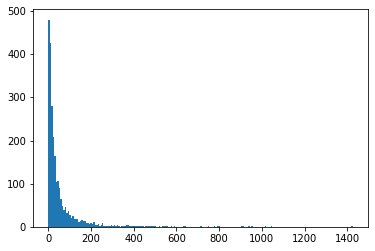

In [51]:
plt.hist(train_y, bins='auto')
plt.show

The predicted demand distribution is plotted below:

<function matplotlib.pyplot.show(*args, **kw)>

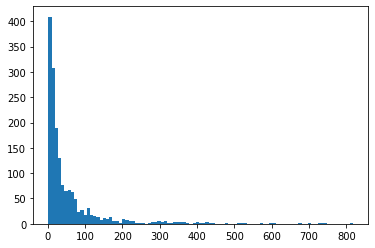

In [52]:
plt.hist(y_pred, bins='auto')
plt.show

Predicted demand seems to be exponentially distributed. This is further verified by comparing to the distribution of true demand in the training data set.

### Inventory Decision

In [53]:
Price=20
Cost=12
Salvage= 8
Over=Cost-Salvage
Under=Price-Cost

In [54]:
import scipy.stats as sct
import math

optimal inventory = $\frac{-ln(1-p)}{\lambda}$ where $p = \frac{C_u}{C_u + C_o}$

In [55]:
opt_dec = sct.expon.ppf(Under/(Under+Over), y_pred)
opt_dec

array([ 67.74999629,  21.07711792,  16.17703472, ..., 279.25731211,
        13.83614279,  24.92124173])

Round up the inventory values to integers

In [56]:
output_test = pd.read_csv('Data-test.csv', index_col=0)
output_test['sales']=y_pred

opt_dec_list=[]
for i in range(len(opt_dec)):
    opt_dec_list.append(math.ceil(opt_dec[i]))


In [57]:
output_test['inventory']=opt_dec_list
output_test.head()

,productID,brandID,attribute1,attribute2,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales,inventory
0,35,2,4.0,100.0,1772.0,118.00,57.293333,26.357143,5,29.411765,0.078431,3.148936,0.551020,0.307692,2.346939,2.596154,2.140000,66.651384,68
1,52,32,3.0,100.0,837.0,250.00,250.000000,34.000000,2,27.142857,0.285714,3.285714,0.571429,0.285714,2.142857,3.285714,1.800000,19.978506,22
2,23,25,3.0,100.0,596.0,69.90,59.900000,45.142857,7,33.333333,0.333333,2.500000,0.666667,0.200000,2.666667,2.000000,3.000000,15.078422,17
3,49,25,3.0,80.0,726.0,139.90,83.212500,11.357143,3,25.333333,0.400000,3.000000,0.500000,0.200000,2.714286,2.400000,2.076923,17.725459,19
4,4,25,3.0,70.0,1664.0,127.03,112.175000,29.428571,1,30.461538,0.346154,2.916667,0.423077,0.153846,2.423077,4.717949,1.840000,33.864974,35


Export data_test with new columns 'sales' and 'inventory'

In [58]:
#output_test.to_csv(r'C:\Users\Darrell\Desktop\group24.csv', index = True, header=True) 

#only to be used to export csv file
#change file path

### PCA Analysis

In [59]:
from sklearn.decomposition import PCA

In [60]:
data_pca = pd.read_csv('Data-train.csv', index_col=0)
data_pca = data_pca.drop(['avgOriginalUnitPrice', 'brandID', 'sales'], axis=1)
data_pca = pd.get_dummies(data_pca, columns = ['productID', 'weekday', 'attribute1', 'attribute2'])
pca_stan = StandardScaler().fit_transform(data_pca)

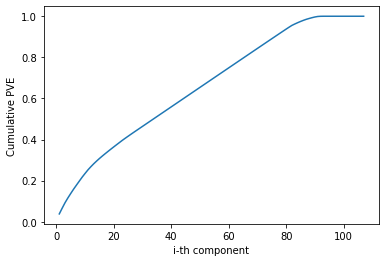

In [61]:
pca = PCA()
pca.fit(pca_stan)
pve = pca.explained_variance_ratio_
plt.plot(np.array(range(len(pve))) + 1,np.cumsum(pve))
plt.xlabel('i-th component')
plt.ylabel('Cumulative PVE')
plt.show()

In [62]:
pcscore = pca.transform(pca_stan)
pca_inverse= pd.DataFrame(pca.inverse_transform(pcscore), index=data_pca.index, columns = data_pca.columns) 

In [63]:
z1=pcscore[:,0]
z2=pcscore[:,1]
phi1=pca.components_[0]
phi2=pca.components_[1]

In [64]:
data_pca.columns

Index(['clickVolume', 'avgFinalUnitPrice', 'ma14SalesVolume', 'meanAge',
       'gender', 'meanEducation', 'maritalStatus', 'plus', 'meanPurchasePower',
       'meanUserLevel',
       ...
       'attribute1_3.0', 'attribute1_4.0', 'attribute2_30.0',
       'attribute2_40.0', 'attribute2_50.0', 'attribute2_60.0',
       'attribute2_70.0', 'attribute2_80.0', 'attribute2_90.0',
       'attribute2_100.0'],
      dtype='object', length=107)

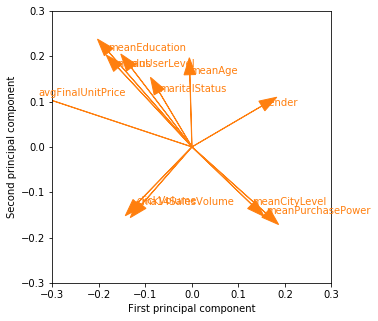

In [65]:
plt.figure(figsize=(5,5))
for j in range(11):
    plt.arrow(0, 0, phi1[j], phi2[j],
              color='tab:orange', width=0.0005, head_width=0.025)
    plt.text(phi1[j]*1.01, phi2[j]*1.01,
            data_pca.columns[j], color='tab:orange') 
plt.axis([-0.3,0.3,-0.3,0.3])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

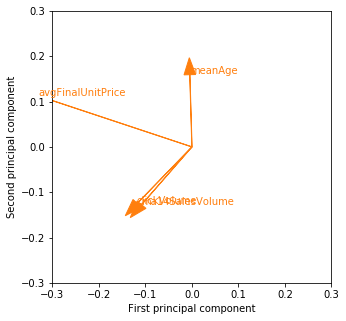

In [66]:
plt.figure(figsize=(5,5))
for j in range(4):
    plt.arrow(0, 0, phi1[j], phi2[j],
              color='tab:orange', width=0.0005, head_width=0.025)
    plt.text(phi1[j]*1.01, phi2[j]*1.01,
            data_pca.columns[j], color='tab:orange') 
plt.axis([-0.3,0.3,-0.3,0.3])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

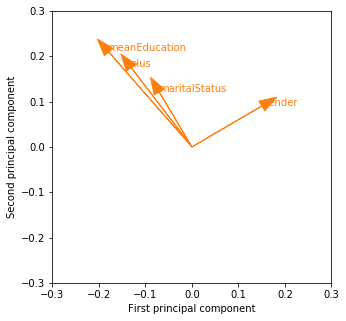

In [67]:
plt.figure(figsize=(5,5))
for j in range(4,8):
    plt.arrow(0, 0, phi1[j], phi2[j],
              color='tab:orange', width=0.0005, head_width=0.025)
    plt.text(phi1[j]*1.01, phi2[j]*1.01,
            data_pca.columns[j], color='tab:orange') 
plt.axis([-0.3,0.3,-0.3,0.3])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

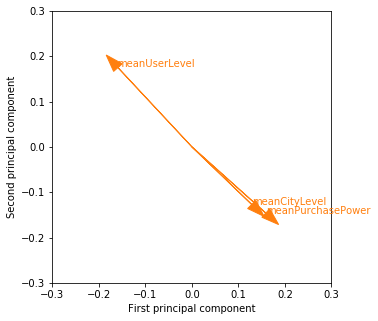

In [68]:
plt.figure(figsize=(5,5))
for j in range(8,11):
    plt.arrow(0, 0, phi1[j], phi2[j],
              color='tab:orange', width=0.0005, head_width=0.025)
    plt.text(phi1[j]*1.01, phi2[j]*1.01,
            data_pca.columns[j], color='tab:orange') 
plt.axis([-0.3,0.3,-0.3,0.3])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()